In [6]:
import numpy as np
import pandas as pd
from statistics import mean
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree

Implement 5-fold nested CV to find optimal parameter configuration for the model. Report: (1) tree visualization (2) the set of best parameters on each split (3) testing mse on each outer split (3) important splits / features (4) algorithm runtime (120s)

In [4]:
data = pd.get_dummies(pd.read_csv('ManualPreprocessedAmesHousing.csv'))

X = data.drop('SalePrice', axis=1).to_numpy()
y = data['SalePrice'].to_numpy()

max_depth = range(5, 30)
min_samples_leaf = range(2, 10)

best = {}

outer_kfold = KFold(n_splits=5)
inner_kfold = KFold(n_splits=4)

for train_index, test_index in outer_kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    best_max_depth = 0
    best_min_samples_leaf = 0
    best_mse = float('inf')
    for depth in max_depth:
        for samples in min_samples_leaf:
            mse = []
            for train_inner_index, _ in inner_kfold.split(X_train):
                test_inner_index = np.array(list(set(train_index) - set(train_inner_index)))
                X_train_inner, X_test_inner = X[train_inner_index], X[test_inner_index]
                y_train_inner, y_test_inner = y[train_inner_index], y[test_inner_index]
                dtr = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=samples)
                dtr.fit(X_train_inner, y_train_inner)
                mse.append(mean_squared_error(y_test_inner, dtr.predict(X_test_inner)))
            avg_mse = mean(mse)

            if avg_mse < best_mse:
                best_mse = avg_mse
                best_max_depth = depth
                best_min_samples_leaf = samples
    dtr = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf)
    dtr.fit(X_train, y_train)
    score = mean_squared_error(y_test, dtr.predict(X_test))
    print(f'for this split, best tuning average mse is {best_mse:.4f}, best max depth is {best_max_depth} best min samples leaf is {best_min_samples_leaf} the testing mse is {score:.4f}')
    tree_viz = tree.export_graphviz(dtr, out_file=None, max_depth=3,
                                feature_names = data.drop('SalePrice', axis=1).columns,  
                                class_names = str(data['SalePrice']),
                                rounded = True,
                                special_characters = True,
                                filled = True)
    graph = graphviz.Source(tree_viz, format="png") 
    graph.render("decision tree"+" "+str(best_max_depth)+" "+str(best_min_samples_leaf)+".png")


for this split, best tuning average mse is 1161.3046, best max depth is 11 best min samples leaf is 6 the testing mse is 1171.1566
for this split, best tuning average mse is 1238.9572, best max depth is 9 best min samples leaf is 3 the testing mse is 813.8527
for this split, best tuning average mse is 1204.3763, best max depth is 11 best min samples leaf is 9 the testing mse is 1369.2007
for this split, best tuning average mse is 1105.9637, best max depth is 9 best min samples leaf is 3 the testing mse is 2139.3489
for this split, best tuning average mse is 1374.8551, best max depth is 11 best min samples leaf is 6 the testing mse is 1050.8147


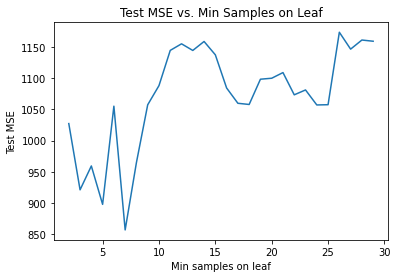

In [12]:
data = pd.get_dummies(pd.read_csv('ManualPreprocessedAmesHousing.csv'))

X = data.drop('SalePrice', axis=1).to_numpy()
y = data['SalePrice'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

test_mse = []
min_samples_leaf = range(2, 30)

for leaves in min_samples_leaf:
    dtr = DecisionTreeRegressor(max_depth=11, min_samples_leaf=leaves)
    dtr.fit(X_train, y_train)
    test_mse.append(mean_squared_error(y_test, dtr.predict(X_test)))

plt.plot(range(2,30), test_mse)
plt.title('Test MSE vs. Min Samples on Leaf')
plt.xlabel('Min samples on leaf')
plt.ylabel('Test MSE')
plt.savefig('leaf.png')
plt.show()

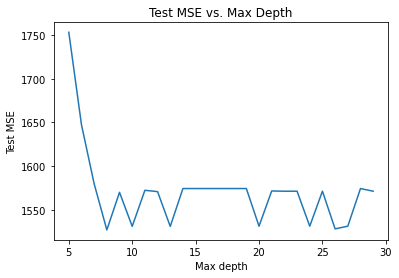

In [8]:
data = pd.get_dummies(pd.read_csv('ManualPreprocessedAmesHousing.csv'))

X = data.drop('SalePrice', axis=1).to_numpy()
y = data['SalePrice'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

test_mse = []
max_depth = range(5, 30)

for depth in max_depth:
    dtr = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=10)
    dtr.fit(X_train, y_train)
    test_mse.append(mean_squared_error(y_test, dtr.predict(X_test)))

plt.plot(range(5,30), test_mse)
plt.title('Test MSE vs. Max Depth')
plt.xlabel('Max depth')
plt.ylabel('Test MSE')
plt.savefig('depth.png')
plt.show()